In [43]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

from sdo.pytorch_utilities import create_dataloader
from sdo.datasets.sdo_dataset import SDO_Dataset

In [21]:
data_basedir = '/fdl_sdo_data/SDOMLmm/fdl_sw/SDOMLmm'
data_inventory = '/home/Valentina/inventory_1904.pkl'

# Loading from a file of events

In [51]:
filename = '/home/Valentina/expanding-sdo-capabilities/rare_events/flares_modelling.csv'
d_events = {'path': filename,'buffer_h': 1, 'buffer_m': 0} # this will load all the images matching 
                                                           # the interval in the files, adding 1h to
                                                           # both ends
dataset = SDO_Dataset(data_basedir = data_basedir,
                      data_inventory = data_inventory,
                      instr=["AIA", "AIA", "AIA", "AIA"], 
                      channels=["0094", "0193", "0171", "0211"],
                      resolution = 512,
                      d_events = d_events)

/home/Valentina/expanding-sdo-capabilities/src/sdo/datasets/dates_selection.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_df['date'] = sel_df.apply(from_row_to_date, axis=1)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,
This day 2011-3-8 is not available
This day 2011-3-8 is not available
This day 2011-3-8 is not available
This day 2011-3-8 is not available
This day 2011-3-8 is not available


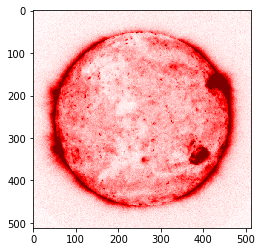

In [52]:
plt.imshow(dataset[0][0][0].detach(), cmap='seismic', vmin=-1, vmax=1.0)

# Loading specific events

In [53]:
datetime_range = [['2011-05-29 00:54:00', '2011-05-29 03:03:00']]
dataset2 = SDO_Dataset(data_basedir = data_basedir,
                      data_inventory = data_inventory,
                      instr=["AIA", "AIA", "AIA", "AIA"], 
                      channels=["0094", "0193", "0171", "0211"],
                      resolution = 512,
                      datetime_range = datetime_range)

/home/Valentina/expanding-sdo-capabilities/src/sdo/datasets/dates_selection.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_df['date'] = sel_df.apply(from_row_to_date, axis=1)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


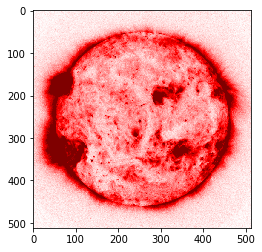

In [56]:
plt.imshow(dataset2[0][0][0].detach(), cmap='seismic', vmin=-1, vmax=1.0)

In [63]:
len(dataset2)

22

22 images are associated to this event

if we reduce the window size we should get less images

In [68]:
datetime_range = [['2011-05-29 01:54:00', '2011-05-29 02:03:00']]
dataset3 = SDO_Dataset(data_basedir = data_basedir,
                      data_inventory = data_inventory,
                      instr=["AIA", "AIA", "AIA", "AIA"], 
                      channels=["0094", "0193", "0171", "0211"],
                      resolution = 512,
                      datetime_range = datetime_range)

/home/Valentina/expanding-sdo-capabilities/src/sdo/datasets/dates_selection.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_df['date'] = sel_df.apply(from_row_to_date, axis=1)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [69]:
len(dataset3)

2

correct! if we reduce the window to just 9 minutes we only get 2 images